<a href="https://colab.research.google.com/github/yashpickles/Titanic_Survivors/blob/main/Titanic_Survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Titanic Survivors**

-**Yash Acharya**

### **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")

### **Importing Datasets**

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### **Data Cleaning**

### **a) Train Set**

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
train_data["Cabin"].value_counts()


B96 B98        4
G6             4
C23 C25 C27    4
F33            3
D              3
              ..
C7             1
A19            1
A7             1
B78            1
A5             1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data_num = train_data[['Age', 'SibSp', 'Parch', 'Fare']]
data_cat = train_data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

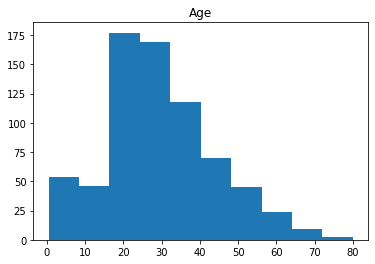

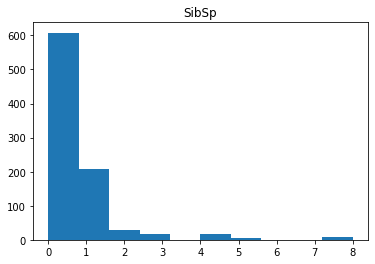

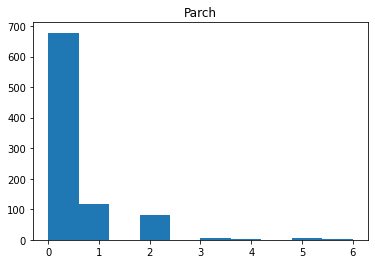

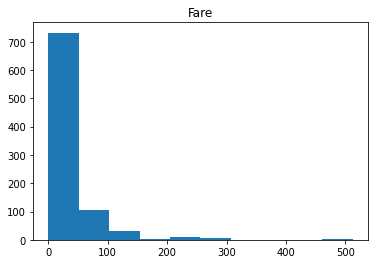

In [ ]:
for i in data_num.columns:
  plt.hist(data_num[i])
  plt.title(i)
  plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


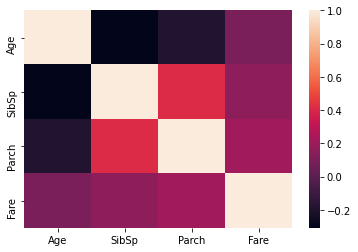

In [ ]:
print(data_num.corr())
sns.heatmap(data_num.corr())

In [ ]:
pd.pivot_table(train_data, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


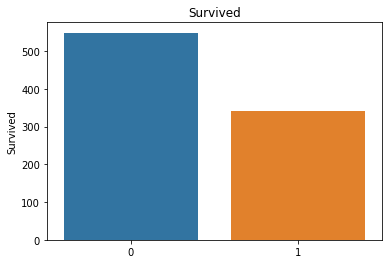

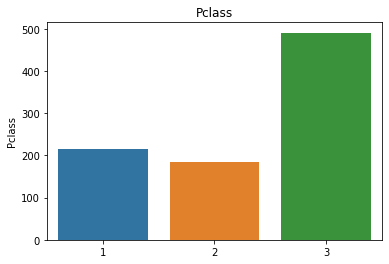

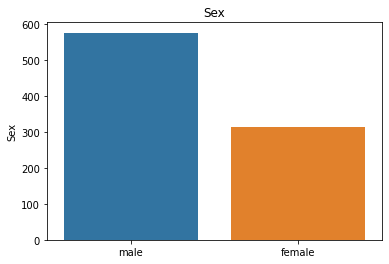

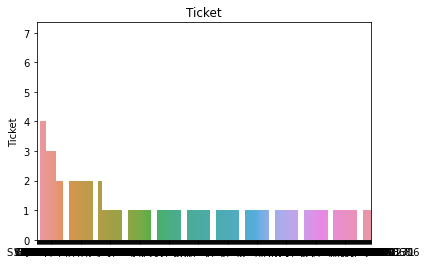

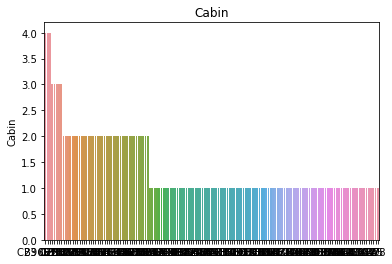

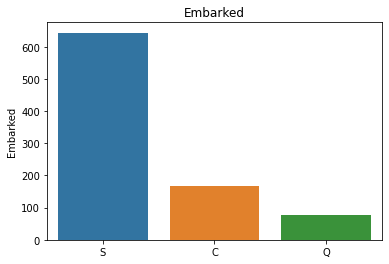

In [ ]:
for i in data_cat.columns:
  sns.barplot(data_cat[i].value_counts().index, data_cat[i].value_counts()).set_title(i)
  plt.show()

In [ ]:
print(pd.pivot_table(train_data, index='Survived', columns='Pclass' ,values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train_data, index='Survived', columns='Sex' ,values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train_data, index='Survived', columns='Embarked' ,values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [ ]:
data_cat.Cabin
train_data['cabin_multiple'] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_data['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [ ]:
print(pd.pivot_table(train_data, index='Survived', columns='cabin_multiple' ,values='Ticket', aggfunc='count'))

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [ ]:
train_data['cabin_adv'] = train_data.Cabin.apply(lambda x: str(x)[0])

In [ ]:
print(train_data.cabin_adv.value_counts())
pd.pivot_table(train_data,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [ ]:
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_data['ticket_letters'] = train_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [ ]:
train_data['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [ ]:
pd.set_option("max_rows", None)
train_data['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
wep            3
pp             3
scah           2
swpp           2
ppp            2
sotono2        2
fa             1
as             1
casoton        1
sp             1
sc             1
scow           1
scahbasle      1
sca4           1
fc             1
sop            1
Name: ticket_letters, dtype: int64

In [ ]:
pd.pivot_table(train_data,index='Survived',columns='numeric_ticket', values = 'Name', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [ ]:
train_data.Name.head(50)
train_data['name_title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Jonkheer          1
Mme               1
Sir               1
the Countess      1
Lady              1
Ms                1
Don               1
Capt              1
Name: name_title, dtype: int64

In [ ]:
train_data.isna().sum()


PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
cabin_multiple      0
cabin_adv           0
numeric_ticket      0
ticket_letters      0
name_title          0
dtype: int64

In [ ]:
train_data.Age = train_data.Age.fillna(train_data.Age.median())

In [ ]:
train_data.Fare = train_data.Fare.fillna(train_data.Fare.median())

In [ ]:
train_data.dropna(subset=['Embarked'],inplace = True)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,a5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0,pc,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,stono2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,0,Mr


In [ ]:
train_data.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
cabin_multiple      0
cabin_adv           0
numeric_ticket      0
ticket_letters      0
name_title          0
dtype: int64

In [ ]:
train_data.drop(columns=['Cabin', 'Name', 'ticket_letters', 'Ticket'], inplace=True)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,name_title
0,1,0,3,male,22.0,1,0,7.2500,S,0,n,0,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,1,C,0,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,0,n,0,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,1,C,1,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,0,n,1,Mr


In [ ]:
train_data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
cabin_multiple    0
cabin_adv         0
numeric_ticket    0
name_title        0
dtype: int64

In [ ]:
train_data.Pclass = train_data.Pclass.astype(str)

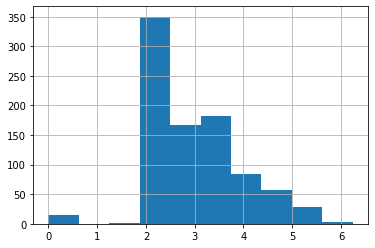

In [ ]:
train_data['norm_fare'] = np.log(train_data.Fare+1)
train_data['norm_fare'].hist()

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,name_title,norm_fare
0,1,0,3,male,22.0,1,0,7.2500,S,0,n,0,Mr,2.110213
1,2,1,1,female,38.0,1,0,71.2833,C,1,C,0,Mrs,4.280593
2,3,1,3,female,26.0,0,0,7.9250,S,0,n,0,Miss,2.188856
3,4,1,1,female,35.0,1,0,53.1000,S,1,C,1,Mrs,3.990834
4,5,0,3,male,35.0,0,0,8.0500,S,0,n,1,Mr,2.202765


In [ ]:
all_the_dummies = pd.get_dummies(train_data[['Pclass','Sex','Embarked','cabin_adv','name_title']])

In [ ]:
all_the_dummies.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data_trained = pd.concat([train_data, all_the_dummies], axis = 1)

In [ ]:
data_trained.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,name_title,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,1,0,3,male,22.0,1,0,7.2500,S,0,n,0,Mr,2.110213,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,1,C,0,Mrs,4.280593,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,n,0,Miss,2.188856,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,C,1,Mrs,3.990834,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,n,1,Mr,2.202765,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data_trained.drop(columns=['Pclass', 'Sex', 'Embarked', 'cabin_adv', 'name_title'], inplace= True)

In [ ]:
data_trained.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,1,0,22.0,1,0,7.2500,0,0,2.110213,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,4.280593,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,2.188856,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,1,3.990834,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,35.0,0,0,8.0500,0,1,2.202765,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_data = data_trained
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,1,0,22.0,1,0,7.2500,0,0,2.110213,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,4.280593,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,2.188856,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,1,3.990834,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,35.0,0,0,8.0500,0,1,2.202765,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_data.shape

(889, 43)

### **b) Test Set**

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data_num = test_data[['Age', 'SibSp', 'Parch', 'Fare']]
data_cat = test_data[['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

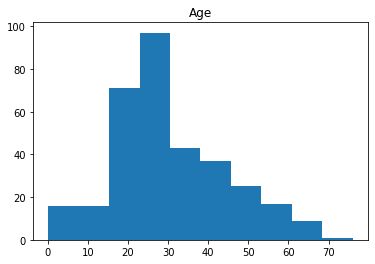

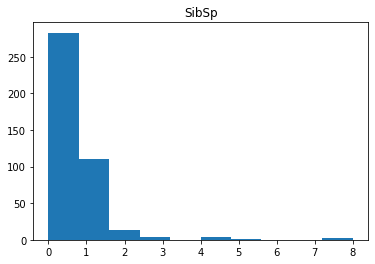

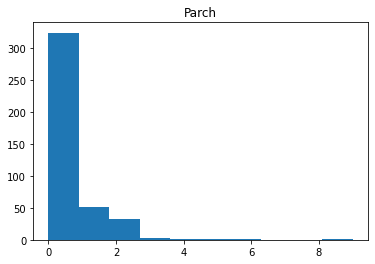

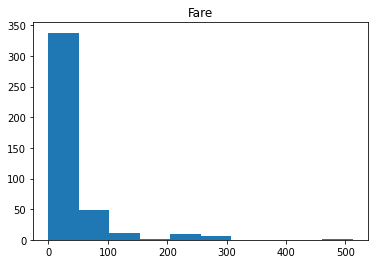

In [ ]:
for i in data_num.columns:
  plt.hist(data_num[i])
  plt.title(i)
  plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.091587 -0.061249  0.337932
SibSp -0.091587  1.000000  0.306895  0.171539
Parch -0.061249  0.306895  1.000000  0.230046
Fare   0.337932  0.171539  0.230046  1.000000


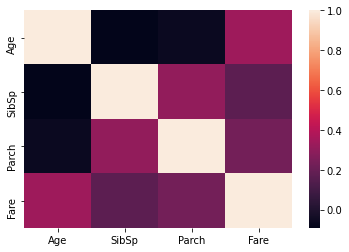

In [ ]:
print(data_num.corr())
sns.heatmap(data_num.corr())

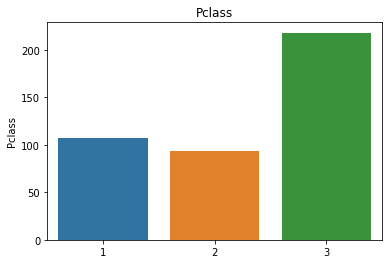

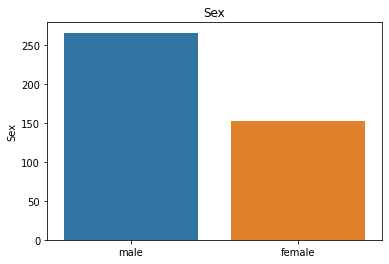

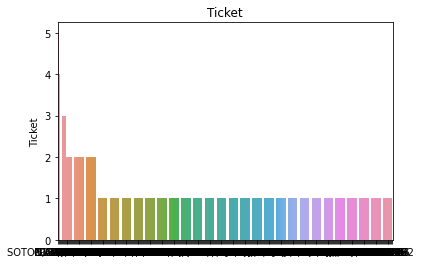

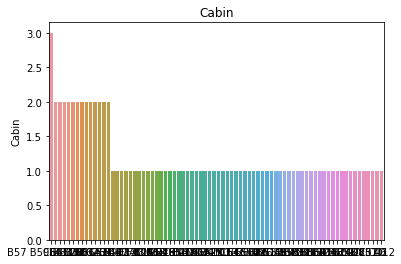

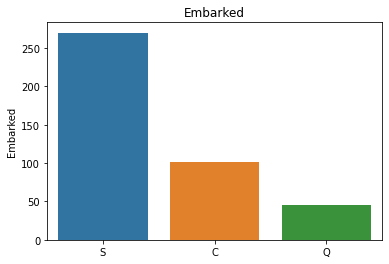

In [ ]:
for i in data_cat.columns:
  sns.barplot(data_cat[i].value_counts().index, data_cat[i].value_counts()).set_title(i)
  plt.show()

In [ ]:
data_cat.Cabin
test_data['cabin_multiple'] = test_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
test_data['cabin_multiple'].value_counts()

0    327
1     74
2     10
3      4
4      3
Name: cabin_multiple, dtype: int64

In [ ]:
test_data['cabin_adv'] = test_data.Cabin.apply(lambda x: str(x)[0])
print(test_data.cabin_adv.value_counts())

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: cabin_adv, dtype: int64


In [ ]:
test_data['numeric_ticket'] = test_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test_data['ticket_letters'] = test_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

pd.set_option("max_rows", None)
test_data['ticket_letters'].value_counts()

0          296
pc          32
ca          27
sotonoq      9
scparis      8
a5           7
wc           5
sopp         4
fcc          4
c            3
stono2       3
a4           3
fc           2
soc          2
scah         2
aq4          1
sca3         1
pp           1
sotono2      1
lp           1
a2           1
wep          1
aq3          1
stonoq       1
sca4         1
sc           1
Name: ticket_letters, dtype: int64

In [ ]:
test_data['numeric_ticket'].value_counts()

1    296
0    122
Name: numeric_ticket, dtype: int64

In [ ]:
test_data.Name.head(50)
test_data['name_title'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['name_title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: name_title, dtype: int64

In [ ]:
test_data.Age = test_data.Age.fillna(train_data.Age.median())
test_data.Fare = test_data.Fare.fillna(train_data.Fare.median())

In [ ]:
test_data.dropna(subset=['Embarked'],inplace = True)

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,n,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,n,1,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,n,1,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,n,1,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,n,1,0,Mrs


In [ ]:
test_data.isna().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             327
Embarked            0
cabin_multiple      0
cabin_adv           0
numeric_ticket      0
ticket_letters      0
name_title          0
dtype: int64

In [ ]:
test_data.drop(columns=['Cabin', 'Name', 'ticket_letters', 'Ticket'], inplace=True)
test_data.head()

test_data.isna().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
cabin_multiple    0
cabin_adv         0
numeric_ticket    0
name_title        0
dtype: int64

In [ ]:
test_data.Pclass = test_data.Pclass.astype(str)

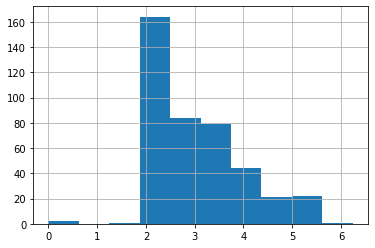

In [ ]:
test_data['norm_fare'] = np.log(test_data.Fare+1)
test_data['norm_fare'].hist()

In [ ]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,name_title,norm_fare
0,892,3,male,34.5,0,0,7.8292,Q,0,n,1,Mr,2.178064
1,893,3,female,47.0,1,0,7.0000,S,0,n,1,Mrs,2.079442
2,894,2,male,62.0,0,0,9.6875,Q,0,n,1,Mr,2.369075
3,895,3,male,27.0,0,0,8.6625,S,0,n,1,Mr,2.268252
4,896,3,female,22.0,1,1,12.2875,S,0,n,1,Mrs,2.586824


In [ ]:
all_the_dummies_2 = pd.get_dummies(test_data[['Pclass','Sex','Embarked','cabin_adv','name_title']])
all_the_dummies_2.head()
data_tested = pd.concat([test_data, all_the_dummies_2], axis = 1)
data_tested.head()
data_tested.drop(columns=['Pclass', 'Sex', 'Embarked', 'cabin_adv', 'name_title'], inplace= True)
data_tested.head()

,PassengerId,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_n,name_title_Col,name_title_Dona,name_title_Dr,name_title_Master,name_title_Miss,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev
0,892,34.5,0,0,7.8292,0,1,2.178064,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,893,47.0,1,0,7.0000,0,1,2.079442,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,894,62.0,0,0,9.6875,0,1,2.369075,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,895,27.0,0,0,8.6625,0,1,2.268252,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,896,22.0,1,1,12.2875,0,1,2.586824,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
test_data = data_tested

In [ ]:
test_data.head()


,PassengerId,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_n,name_title_Col,name_title_Dona,name_title_Dr,name_title_Master,name_title_Miss,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev
0,892,34.5,0,0,7.8292,0,1,2.178064,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,893,47.0,1,0,7.0000,0,1,2.079442,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,894,62.0,0,0,9.6875,0,1,2.369075,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,895,27.0,0,0,8.6625,0,1,2.268252,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,896,22.0,1,1,12.2875,0,1,2.586824,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
test_data.shape

(418, 33)

### **Exploratory Data Analysis(EDA)**

### **a) Feature Selection**

In [ ]:
train_data_len = len(train_data)

In [ ]:
joined_data = pd.concat([train_data, test_data], axis = 0).reset_index(drop = True)

In [ ]:
joined_data.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess,name_title_Dona
0,1,0.0,22.0,1,0,7.2500,0,0,2.110213,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,1,0,0,0,0.0,0.0,NaN
1,2,1.0,38.0,1,0,71.2833,1,0,4.280593,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,1,0,0,0.0,0.0,NaN
2,3,1.0,26.0,0,0,7.9250,0,0,2.188856,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,0,0,0,0,0.0,0.0,NaN
3,4,1.0,35.0,1,0,53.1000,1,1,3.990834,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,1,0,0,0.0,0.0,NaN
4,5,0.0,35.0,0,0,8.0500,0,1,2.202765,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,1,0,0,0,0.0,0.0,NaN
5,6,0.0,28.0,0,0,8.4583,0,1,2.246893,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,1,0,0,0,0.0,0.0,NaN
6,7,0.0,54.0,0,0,51.8625,1,1,3.967694,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,1,0,0,0,0.0,0.0,NaN
7,8,0.0,2.0,3,1,21.0750,0,1,3.094446,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,1,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN
8,9,1.0,27.0,0,2,11.1333,0,1,2.495954,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,1,0,0,0.0,0.0,NaN
9,10,1.0,14.0,1,0,30.0708,0,1,3.436268,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,1,0,0,0.0,0.0,NaN


In [ ]:
joined_data.tail(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess,name_title_Dona
1297,1300,NaN,28.0,0,0,7.7208,0,1,2.165711,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,NaN,1,NaN,0,NaN,0,NaN,NaN,NaN,0,1,NaN,NaN,0,0,0,0,NaN,NaN,0.0
1298,1301,NaN,3.0,1,1,13.7750,0,0,2.692937,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,NaN,1,NaN,0,NaN,0,NaN,NaN,NaN,0,1,NaN,NaN,0,0,0,0,NaN,NaN,0.0
1299,1302,NaN,28.0,0,0,7.7500,0,1,2.169054,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,NaN,1,NaN,0,NaN,0,NaN,NaN,NaN,0,1,NaN,NaN,0,0,0,0,NaN,NaN,0.0
1300,1303,NaN,37.0,1,0,90.0000,1,1,4.510860,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,0,1,0,0,NaN,NaN,0.0
1301,1304,NaN,28.0,0,0,7.7750,0,1,2.171907,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,NaN,1,NaN,0,NaN,0,NaN,NaN,NaN,0,1,NaN,NaN,0,0,0,0,NaN,NaN,0.0
1302,1305,NaN,28.0,0,0,8.0500,0,0,2.202765,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,NaN,1,NaN,0,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,1,0,0,0,NaN,NaN,0.0
1303,1306,NaN,39.0,0,0,108.9000,1,0,4.699571,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,0,0,0,0,NaN,NaN,1.0
1304,1307,NaN,38.5,0,0,7.2500,0,0,2.110213,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,NaN,1,NaN,0,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,1,0,0,0,NaN,NaN,0.0
1305,1308,NaN,28.0,0,0,8.0500,0,1,2.202765,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,NaN,1,NaN,0,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,1,0,0,0,NaN,NaN,0.0
1306,1309,NaN,28.0,1,1,22.3583,0,1,3.150952,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,NaN,1,NaN,0,NaN,0,NaN,NaN,NaN,1,0,NaN,NaN,0,0,0,0,NaN,NaN,0.0


In [ ]:
joined_data.columns[joined_data.isnull().any()]

Index(['Survived', 'cabin_adv_T', 'name_title_Capt', 'name_title_Don',
       'name_title_Jonkheer', 'name_title_Lady', 'name_title_Major',
       'name_title_Mlle', 'name_title_Mme', 'name_title_Sir',
       'name_title_the Countess', 'name_title_Dona'],
      dtype='object')

In [ ]:
joined_data.shape

(1307, 44)

**Filling NaN values**

In [ ]:
joined_data.isnull().sum()

PassengerId                  0
Survived                   418
Age                          0
SibSp                        0
Parch                        0
Fare                         0
cabin_multiple               0
numeric_ticket               0
norm_fare                    0
Pclass_1                     0
Pclass_2                     0
Pclass_3                     0
Sex_female                   0
Sex_male                     0
Embarked_C                   0
Embarked_Q                   0
Embarked_S                   0
cabin_adv_A                  0
cabin_adv_B                  0
cabin_adv_C                  0
cabin_adv_D                  0
cabin_adv_E                  0
cabin_adv_F                  0
cabin_adv_G                  0
cabin_adv_T                418
cabin_adv_n                  0
name_title_Capt            418
name_title_Col               0
name_title_Don             418
name_title_Dr                0
name_title_Jonkheer        418
name_title_Lady            418
name_tit

In [ ]:
joined_data["cabin_adv_T"] = joined_data["cabin_adv_T"].fillna("0")

In [ ]:
joined_data["name_title_Capt"] = joined_data["name_title_Capt"].fillna("0")

In [ ]:
joined_data["name_title_Don"] = joined_data["name_title_Don"].fillna("0")

In [ ]:
joined_data["name_title_Jonkheer"] = joined_data["name_title_Jonkheer"].fillna("0")

In [ ]:
joined_data["name_title_Lady"] = joined_data["name_title_Lady"].fillna("0")

In [ ]:
joined_data["name_title_Major"] = joined_data["name_title_Major"].fillna("0")

In [ ]:
joined_data["name_title_Mlle"] = joined_data["name_title_Mlle"].fillna("0")

In [ ]:
joined_data["name_title_Mme"] = joined_data["name_title_Mme"].fillna("0")

In [ ]:
joined_data["name_title_Sir"] = joined_data["name_title_Sir"].fillna("0")

In [ ]:
joined_data["name_title_the Countess"] = joined_data["name_title_the Countess"].fillna("0")

In [ ]:
joined_data["name_title_Dona"] = joined_data["name_title_Dona"].fillna("0")

In [ ]:
joined_data.isnull().sum()

PassengerId                  0
Survived                   418
Age                          0
SibSp                        0
Parch                        0
Fare                         0
cabin_multiple               0
numeric_ticket               0
norm_fare                    0
Pclass_1                     0
Pclass_2                     0
Pclass_3                     0
Sex_female                   0
Sex_male                     0
Embarked_C                   0
Embarked_Q                   0
Embarked_S                   0
cabin_adv_A                  0
cabin_adv_B                  0
cabin_adv_C                  0
cabin_adv_D                  0
cabin_adv_E                  0
cabin_adv_F                  0
cabin_adv_G                  0
cabin_adv_T                  0
cabin_adv_n                  0
name_title_Capt              0
name_title_Col               0
name_title_Don               0
name_title_Dr                0
name_title_Jonkheer          0
name_title_Lady              0
name_tit

In [ ]:
train_data_len

889

In [ ]:
test = joined_data.iloc[889:1308,:]
test.drop(labels = ["Survived"], axis = 1, inplace = True)

In [ ]:
test.shape

(418, 43)

In [ ]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess,name_title_Dona
889,892,34.5,0,0,7.8292,0,1,2.178064,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
890,893,47.0,1,0,7.0000,0,1,2.079442,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
891,894,62.0,0,0,9.6875,0,1,2.369075,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
892,895,27.0,0,0,8.6625,0,1,2.268252,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
893,896,22.0,1,1,12.2875,0,1,2.586824,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare',
       'cabin_multiple', 'numeric_ticket', 'norm_fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'cabin_adv_A', 'cabin_adv_B', 'cabin_adv_C',
       'cabin_adv_D', 'cabin_adv_E', 'cabin_adv_F', 'cabin_adv_G',
       'cabin_adv_T', 'cabin_adv_n', 'name_title_Capt', 'name_title_Col',
       'name_title_Don', 'name_title_Dr', 'name_title_Jonkheer',
       'name_title_Lady', 'name_title_Major', 'name_title_Master',
       'name_title_Miss', 'name_title_Mlle', 'name_title_Mme', 'name_title_Mr',
       'name_title_Mrs', 'name_title_Ms', 'name_title_Rev', 'name_title_Sir',
       'name_title_the Countess'],
      dtype='object')

In [ ]:
train_data.drop(columns=['Fare'], inplace=True)

In [ ]:
train_data.dtypes

PassengerId                  int64
Survived                     int64
Age                        float64
SibSp                        int64
Parch                        int64
cabin_multiple               int64
numeric_ticket               int64
norm_fare                  float64
Pclass_1                     uint8
Pclass_2                     uint8
Pclass_3                     uint8
Sex_female                   uint8
Sex_male                     uint8
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
cabin_adv_A                  uint8
cabin_adv_B                  uint8
cabin_adv_C                  uint8
cabin_adv_D                  uint8
cabin_adv_E                  uint8
cabin_adv_F                  uint8
cabin_adv_G                  uint8
cabin_adv_T                  uint8
cabin_adv_n                  uint8
name_title_Capt              uint8
name_title_Col               uint8
name_title_Don               uint8
name_title_Dr       

In [ ]:
train_data['cabin_adv_n'] = pd.to_numeric(train_data['cabin_adv_n'],errors='coerce')

In [ ]:
X = train_data.loc[:, ['PassengerId', 'Age', 'SibSp', 'Parch',
       'cabin_multiple', 'numeric_ticket', 'norm_fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'cabin_adv_A', 'cabin_adv_B', 'cabin_adv_C',
       'cabin_adv_D', 'cabin_adv_E', 'cabin_adv_F', 'cabin_adv_G',
       'cabin_adv_T', 'cabin_adv_n', 'name_title_Capt', 'name_title_Col',
       'name_title_Don', 'name_title_Dr', 'name_title_Jonkheer',
       'name_title_Lady', 'name_title_Major', 'name_title_Master',
       'name_title_Miss', 'name_title_Mlle', 'name_title_Mme', 'name_title_Mr',
       'name_title_Mrs', 'name_title_Ms', 'name_title_Rev', 'name_title_Sir',
       'name_title_the Countess']]
X.head()       

,PassengerId,Age,SibSp,Parch,cabin_multiple,numeric_ticket,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,1,22.0,1,0,0,0,2.110213,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,38.0,1,0,1,0,4.280593,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,0,0,2.188856,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,35.0,1,0,1,1,3.990834,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,35.0,0,0,0,1,2.202765,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
y = train_data.iloc[:, 1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[1.27673010e-01 1.24745745e-01 3.83924541e-02 1.83326631e-02
 1.03780801e-02 2.23050743e-02 1.31188258e-01 2.58728263e-03
 4.66221116e-03 7.32288118e-02 7.98181730e-03 6.34382739e-03
 1.03013210e-02 5.11317427e-03 1.77822138e-02 7.47200916e-03
 3.32333534e-03 6.93772044e-03 2.69146862e-03 6.82273936e-03
 1.82271743e-03 1.12707182e-03 2.12155304e-05 2.03080847e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.48355298e-04
 0.00000000e+00 0.00000000e+00 1.08634237e-04 1.42379921e-02
 5.52281825e-03 0.00000000e+00 0.00000000e+00 2.99962704e-01
 5.46350974e-03 0.00000000e+00 2.28136808e-02 0.00000000e+00
 0.00000000e+00]


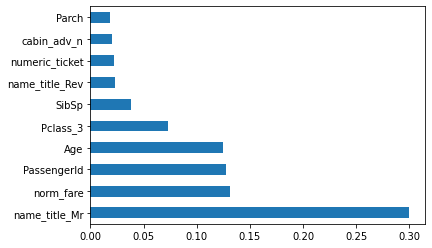

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

### **b) Heat Map**

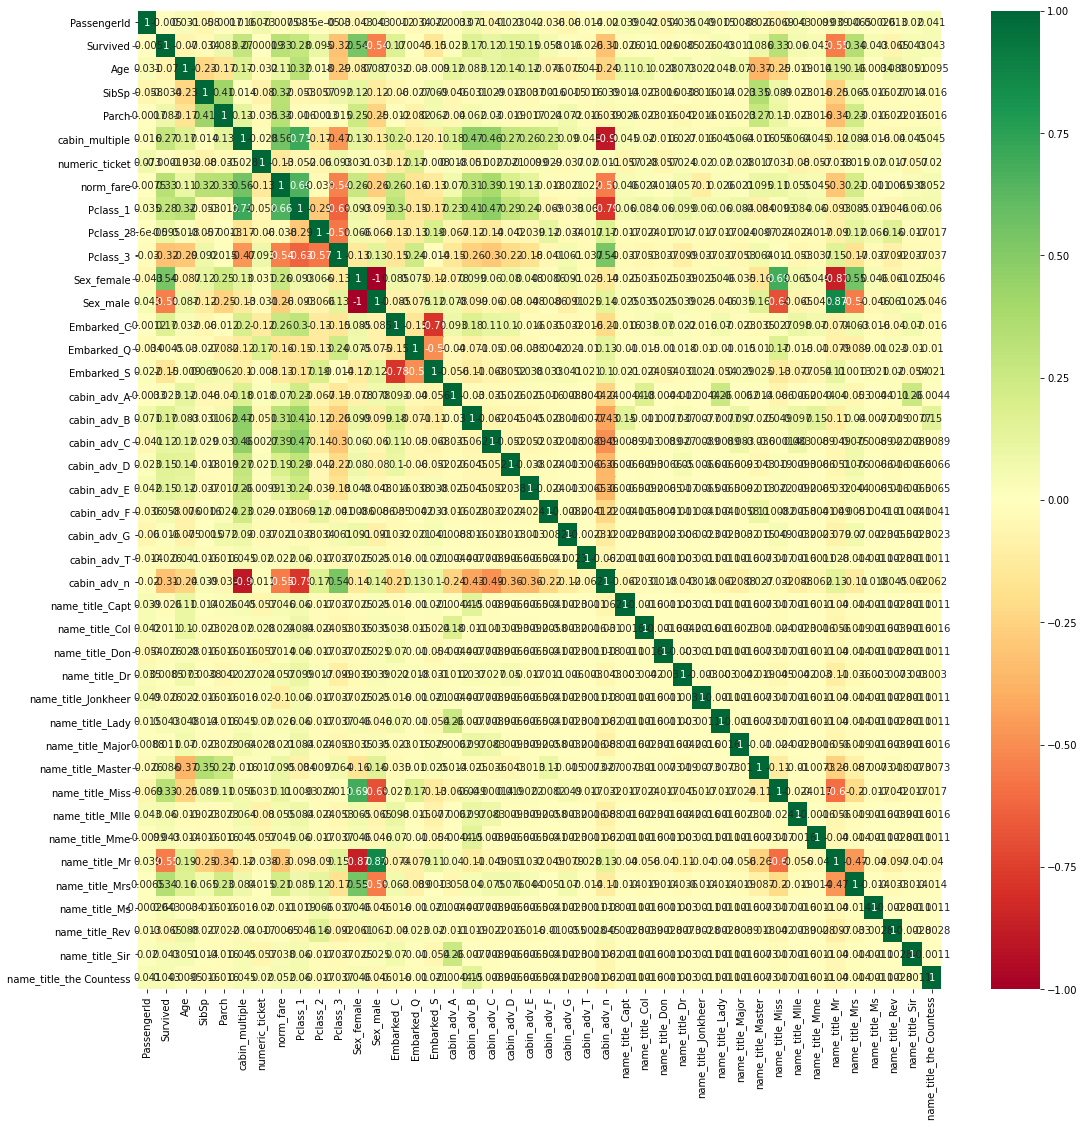

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

### **Splitting the Dataset into Training and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 22)

In [ ]:
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))
print("test", len(test))

X_train 595
X_test 294
y_train 595
y_test 294
test 418


### **Model Training**

### **1)Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
svc_class = SVC(probability=True)
svc_class.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svc_class.predict(X_test)

In [ ]:
acc_SVC_train = round(svc_class.score(X_train, y_train)*100,2)
acc_SVC_test = round(svc_class.score(X_test, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_SVC_train))
print("Testing Accuracy: % {}".format(acc_SVC_test))

Training Accuracy: % 63.36
Testing Accuracy: % 58.5


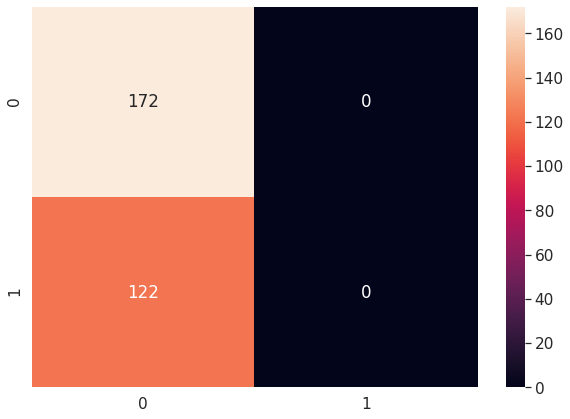

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       172
           1       0.00      0.00      0.00       122

    accuracy                           0.59       294
   macro avg       0.29      0.50      0.37       294
weighted avg       0.34      0.59      0.43       294



In [ ]:
print("Test Accuracy: %0.4f" %accuracy_score(y_test, y_pred))

Test Accuracy: 0.5850


### **1.a)K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svc_class, X=X_train, y=y_train, cv=10)
print("Support Vector Classifier Accuracy(Train): % 0.2f(+/- %0.2f)" %(accuracies.mean(), accuracies.std()*2))

Support Vector Classifier Accuracy(Train):  0.63(+/- 0.01)


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svc_class, X=X_test, y=y_test, cv=10)
print("Support Vector Classifier Accuracy(Test): % 0.2f(+/- %0.2f)" %(accuracies.mean(), accuracies.std()*2))

Support Vector Classifier Accuracy(Test):  0.59(+/- 0.02)


### **2)Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier()
rf_reg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_reg.predict(X_test)

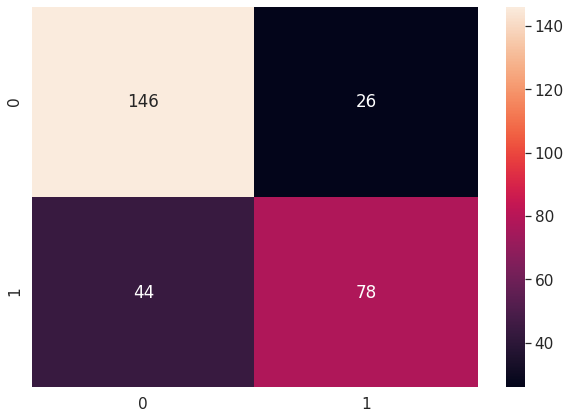

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       172
           1       0.75      0.64      0.69       122

    accuracy                           0.76       294
   macro avg       0.76      0.74      0.75       294
weighted avg       0.76      0.76      0.76       294



In [ ]:
print("Test Accuracy: %0.4f" %accuracy_score(y_test, y_pred))

Test Accuracy: 0.7619


In [ ]:
acc_rfc_train = round(rf_reg.score(X_train, y_train)*100,2)
acc_rfc_test = round(rf_reg.score(X_test, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rfc_train))
print("Testing Accuracy: % {}".format(acc_rfc_test))

Training Accuracy: % 100.0
Testing Accuracy: % 76.19


### **2.a)K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=10)
print("Random Forest Classifier Accuracy: % 0.2f(+/- %0.2f)" %(accuracies.mean(), accuracies.std()*2))

Random Forest Classifier Accuracy:  0.83(+/- 0.07)


### **3) Hyper-Parametric Tuning**

### **3a) Using Randomized Search CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf_randomcv=RandomizedSearchCV(estimator=rf_reg,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 450,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:

rf_randomcv

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = best_random_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test, y_pred)))
print("Classification report: {}".format(classification_report(y_test, y_pred)))

[[147  25]
 [ 43  79]]
Accuracy Score 0.7687074829931972
Classification report:               precision    recall  f1-score   support

           0       0.77      0.85      0.81       172
           1       0.76      0.65      0.70       122

    accuracy                           0.77       294
   macro avg       0.77      0.75      0.76       294
weighted avg       0.77      0.77      0.77       294



In [ ]:
acc_random_train = round(best_random_grid.score(X_train, y_train)*100,2)
acc_random_test = round(best_random_grid.score(X_test, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_random_train))
print("Testing Accuracy: % {}".format(acc_random_test))

Training Accuracy: % 95.8
Testing Accuracy: % 76.87


### **Now Using Grid Search CV to refine it**

In [ ]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 450,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [450], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [0, 100, 200, 300, 400]}


In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  3.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:

grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=450, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

best_grid=grid_search.best_estimator_

In [ ]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=450, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[153  19]
 [ 46  76]]
Accuracy Score 0.7789115646258503
Classification report:               precision    recall  f1-score   support

           0       0.77      0.89      0.82       172
           1       0.80      0.62      0.70       122

    accuracy                           0.78       294
   macro avg       0.78      0.76      0.76       294
weighted avg       0.78      0.78      0.77       294



In [ ]:
acc_grid_train = round(best_grid.score(X_train, y_train)*100,2)
acc_grid_test = round(best_grid.score(X_test, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_grid_train))
print("Testing Accuracy: % {}".format(acc_grid_test))

Training Accuracy: % 88.91
Testing Accuracy: % 77.89


In [ ]:
X_test.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'cabin_multiple',
       'numeric_ticket', 'norm_fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'cabin_adv_A', 'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D',
       'cabin_adv_E', 'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T',
       'cabin_adv_n', 'name_title_Capt', 'name_title_Col', 'name_title_Don',
       'name_title_Dr', 'name_title_Jonkheer', 'name_title_Lady',
       'name_title_Major', 'name_title_Master', 'name_title_Miss',
       'name_title_Mlle', 'name_title_Mme', 'name_title_Mr', 'name_title_Mrs',
       'name_title_Ms', 'name_title_Rev', 'name_title_Sir',
       'name_title_the Countess'],
      dtype='object')

In [ ]:
test.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_multiple',
       'numeric_ticket', 'norm_fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'cabin_adv_A', 'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D',
       'cabin_adv_E', 'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T',
       'cabin_adv_n', 'name_title_Capt', 'name_title_Col', 'name_title_Don',
       'name_title_Dr', 'name_title_Jonkheer', 'name_title_Lady',
       'name_title_Major', 'name_title_Master', 'name_title_Miss',
       'name_title_Mlle', 'name_title_Mme', 'name_title_Mr', 'name_title_Mrs',
       'name_title_Ms', 'name_title_Rev', 'name_title_Sir',
       'name_title_the Countess', 'name_title_Dona'],
      dtype='object')

In [ ]:
test.drop(columns=['name_title_Dona', 'Fare'], inplace=True)

In [ ]:
test_PassengerId = test_data["PassengerId"]

In [ ]:
test_survived = pd.Series(rf_reg.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic2.csv", index = False)

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_classificatiion_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_reg, file)